<a href="https://colab.research.google.com/github/dvircohen0/Machine-Learning-Algorithms-From-Scratch/blob/main/clustering%5CDBscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import datasets

In [39]:
iris = datasets.load_iris()
X = iris.data

eps = 0.8
min_samples = 19


dim=len(X)
dis=np.zeros((dim,dim))
for i in range(dim):
    for j in range(dim):
        dis[i,j]=np.linalg.norm(X[i,:]-X[j,:])

In [40]:
def MyDBSCAN(Data, eps, MinPts):
    labels = [0]*len(Data)
    C = 0
    for i in range(len(Data)):
        if (labels[i] == 0):
            Neighbors_i = my_neighbors(Data, i, eps)
            if len(Neighbors_i) < MinPts:
               labels[i] = -1
            else: 
               C += 1
               create_cluster(Data, labels, i, Neighbors_i, C, eps, MinPts)
    return labels

In [41]:
def create_cluster(data,labels,P,neighbors_of_P,Cluster_N,eps,MinPts):
    labels[P]=Cluster_N
    i=0
    while i < len(neighbors_of_P):
        if (labels[neighbors_of_P[i]] == -1 or labels[neighbors_of_P[i]] == 0):
           labels[neighbors_of_P[i]] = Cluster_N
           PnNeighborPts = my_neighbors(data, neighbors_of_P[i], eps)
           if len(PnNeighborPts) >= MinPts:
              neighbors_of_P=neighbors_of_P + PnNeighborPts
        i+=1

In [42]:
def my_neighbors(data,P,eps):
    neighbors=[]
    for i in range(len(data)):
        if dis[P,i] < eps:
            neighbors.append(i)
    return neighbors

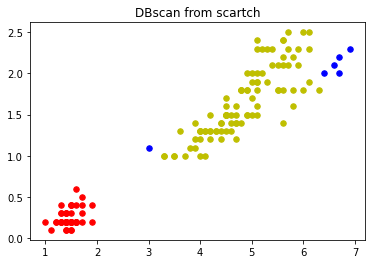

In [43]:
my_labels = MyDBSCAN(X, eps, min_samples)

colors=['b','r','y']
for i in range(len(my_labels)):
    for j in range(len(np.unique(my_labels))):
        if my_labels[i]==np.unique(my_labels)[j]:
           plt.scatter(X[i,2],X[i,3],c=colors[j], s=30)
plt.title('DBscan from scartch') 
plt.show()

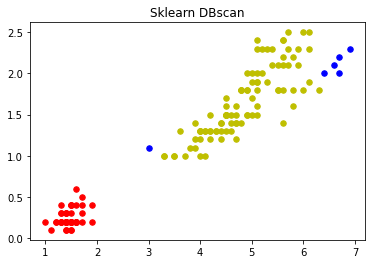

In [44]:
my_labels2 = DBSCAN(eps, min_samples).fit_predict(X)

for i in range(len(my_labels2)):
    for j in range(len(np.unique(my_labels2))):
        if my_labels2[i]==np.unique(my_labels2)[j]:
           plt.scatter(X[i,2],X[i,3],c=colors[j], s=30)
plt.title('Sklearn DBscan')
plt.show()

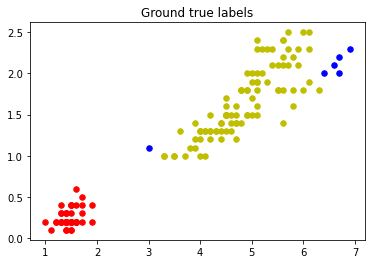

In [45]:
y= iris.target
for i in range(len(y)):
    for j in range(len(np.unique(y))):
        if my_labels2[i]==np.unique(my_labels2)[j]:
           plt.scatter(X[i,2],X[i,3],c=colors[j], s=30)
plt.title('Ground true labels')
plt.show()